In [212]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import codecs
rcParams['savefig.dpi'] = 500
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [213]:
FOLDER = "/Users/alesvane/Dropbox/Data/SongLyrics/Lyrics"
is_word = lambda s: not s in list(".¿!?(),;-:")+["..."] # TODO make scaleable...

In [214]:
songs = filter(lambda s: not s.startswith('.'), os.listdir(FOLDER))
bags = dict([(s,set(filter(is_word, map(unicode.lower,tokenizer.tokenize(codecs.open(FOLDER+os.sep+s,encoding='utf-8').read()))))) for s in songs])

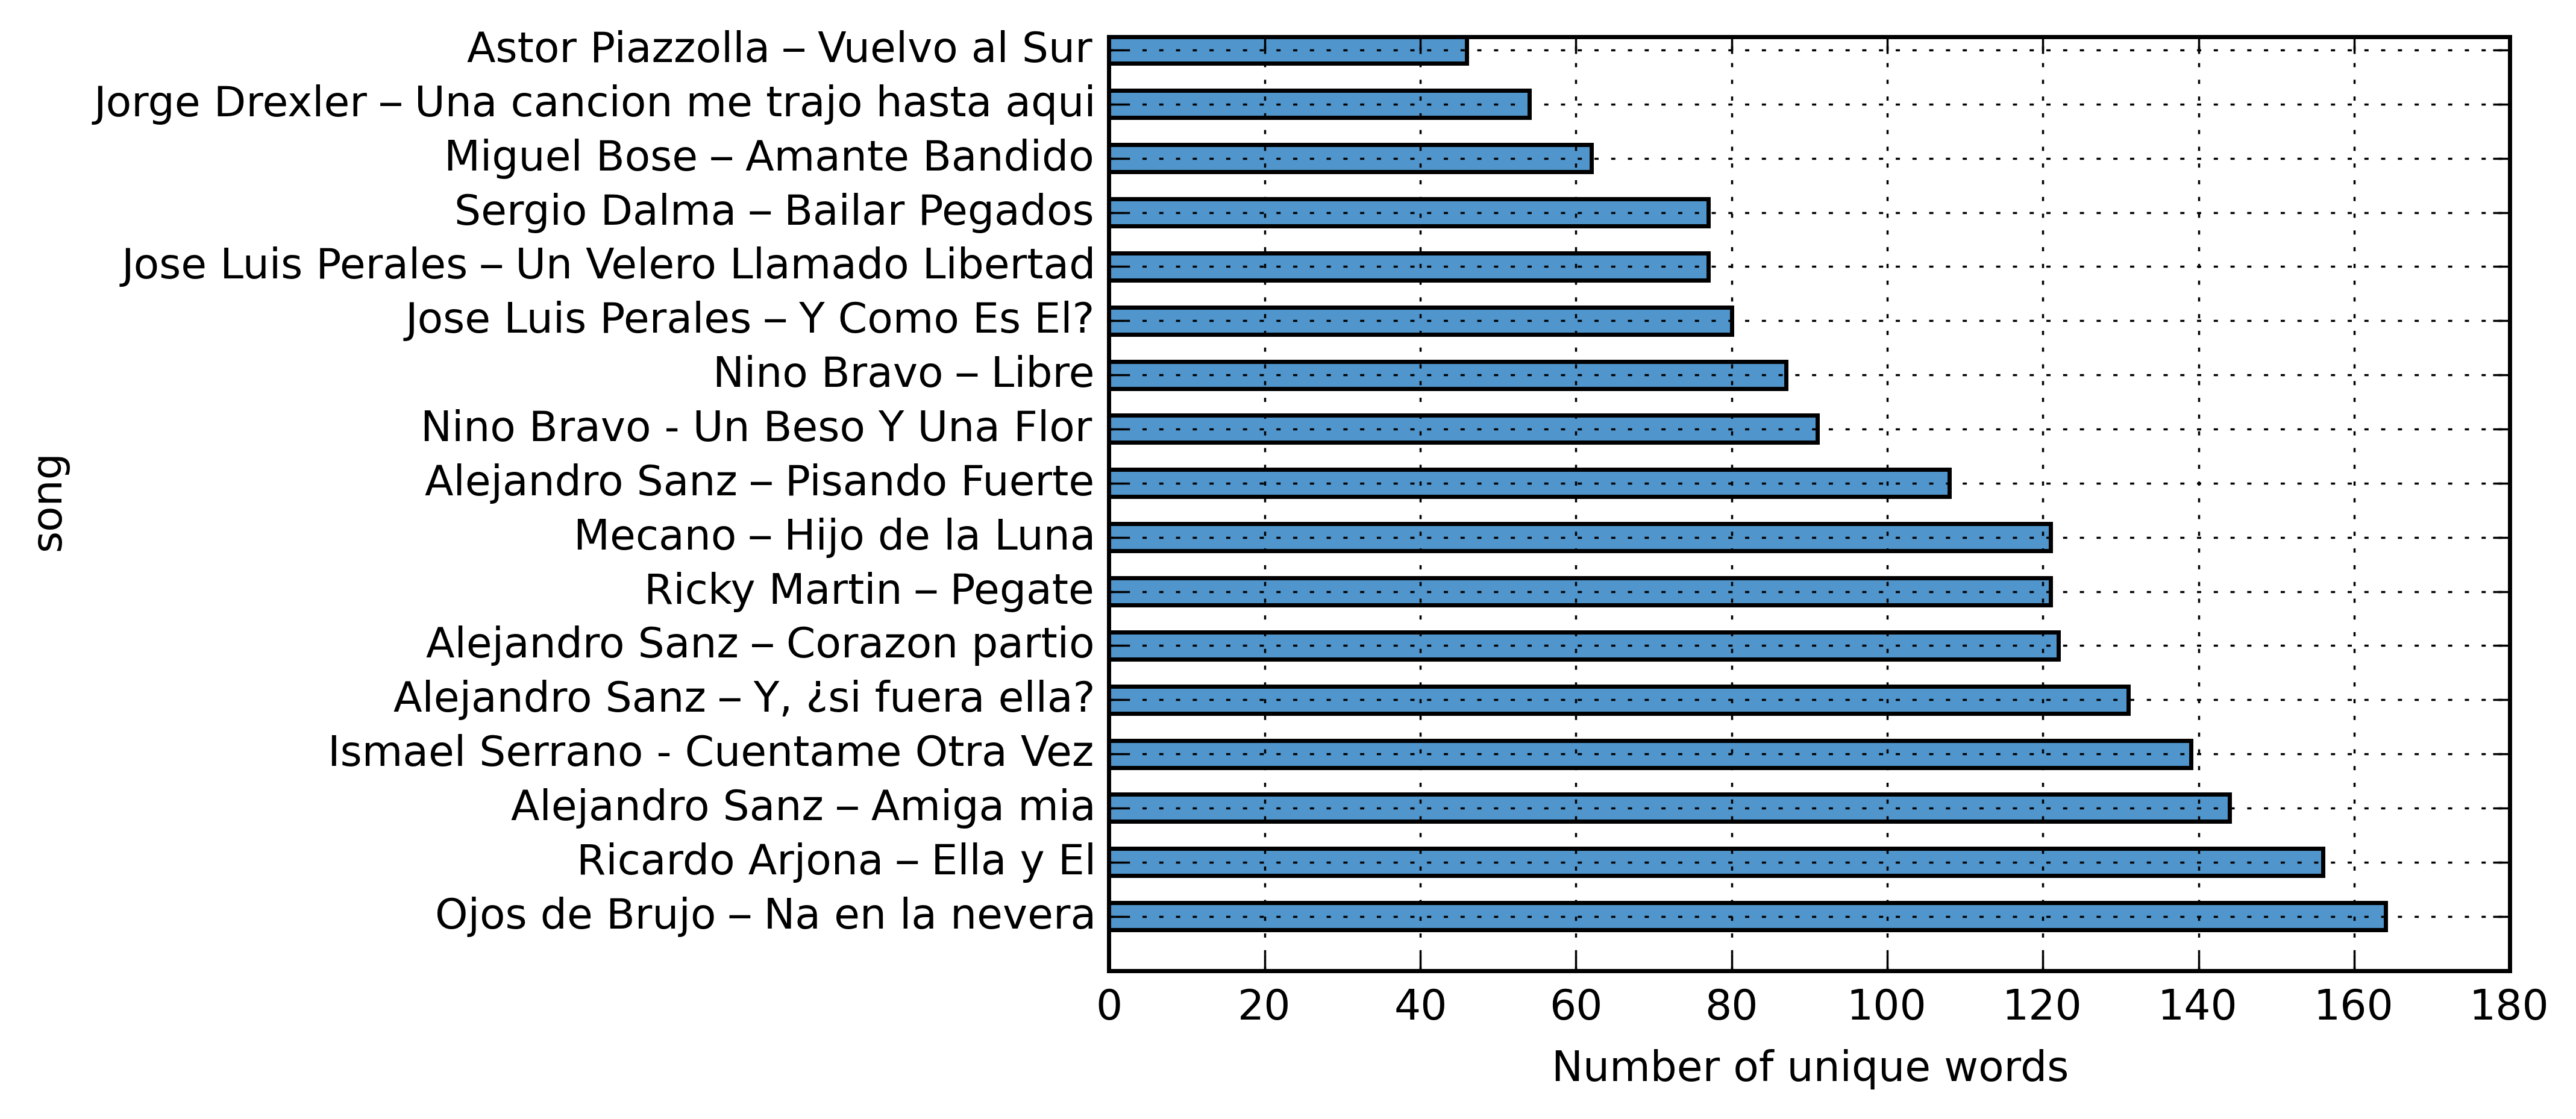

In [215]:
data = [(k,len(v)) for (k,v) in bags.iteritems()]
num_words = pd.DataFrame(data,columns=["song","num_words"]).set_index("song").num_words
num_words.order(ascending=False).plot(kind="barh",color='#5095CB')
_ = xlabel("Number of unique words")

In [216]:
FREQ_FILE = "/Users/alesvane/Dropbox/Lang/Frequencies/es.txt"
freqs = pd.read_csv(FREQ_FILE,sep=" ",header=False,names=["word","num"],encoding="utf-8")
freqs["word"] = freqs["word"].map(unicode)
freqs = freqs.set_index("word").num.rank(ascending=False).map(round).map(int)

In [217]:
word_ranks = [(k,pd.Series(map(lambda k: freqs.get(k,np.nan),bags[k]))) for k in bags.keys()]
medians = map(lambda (k,v): (k,v.median()),word_ranks)
word_median = pd.DataFrame(medians,columns=["song","word_median"]).set_index("song").word_median

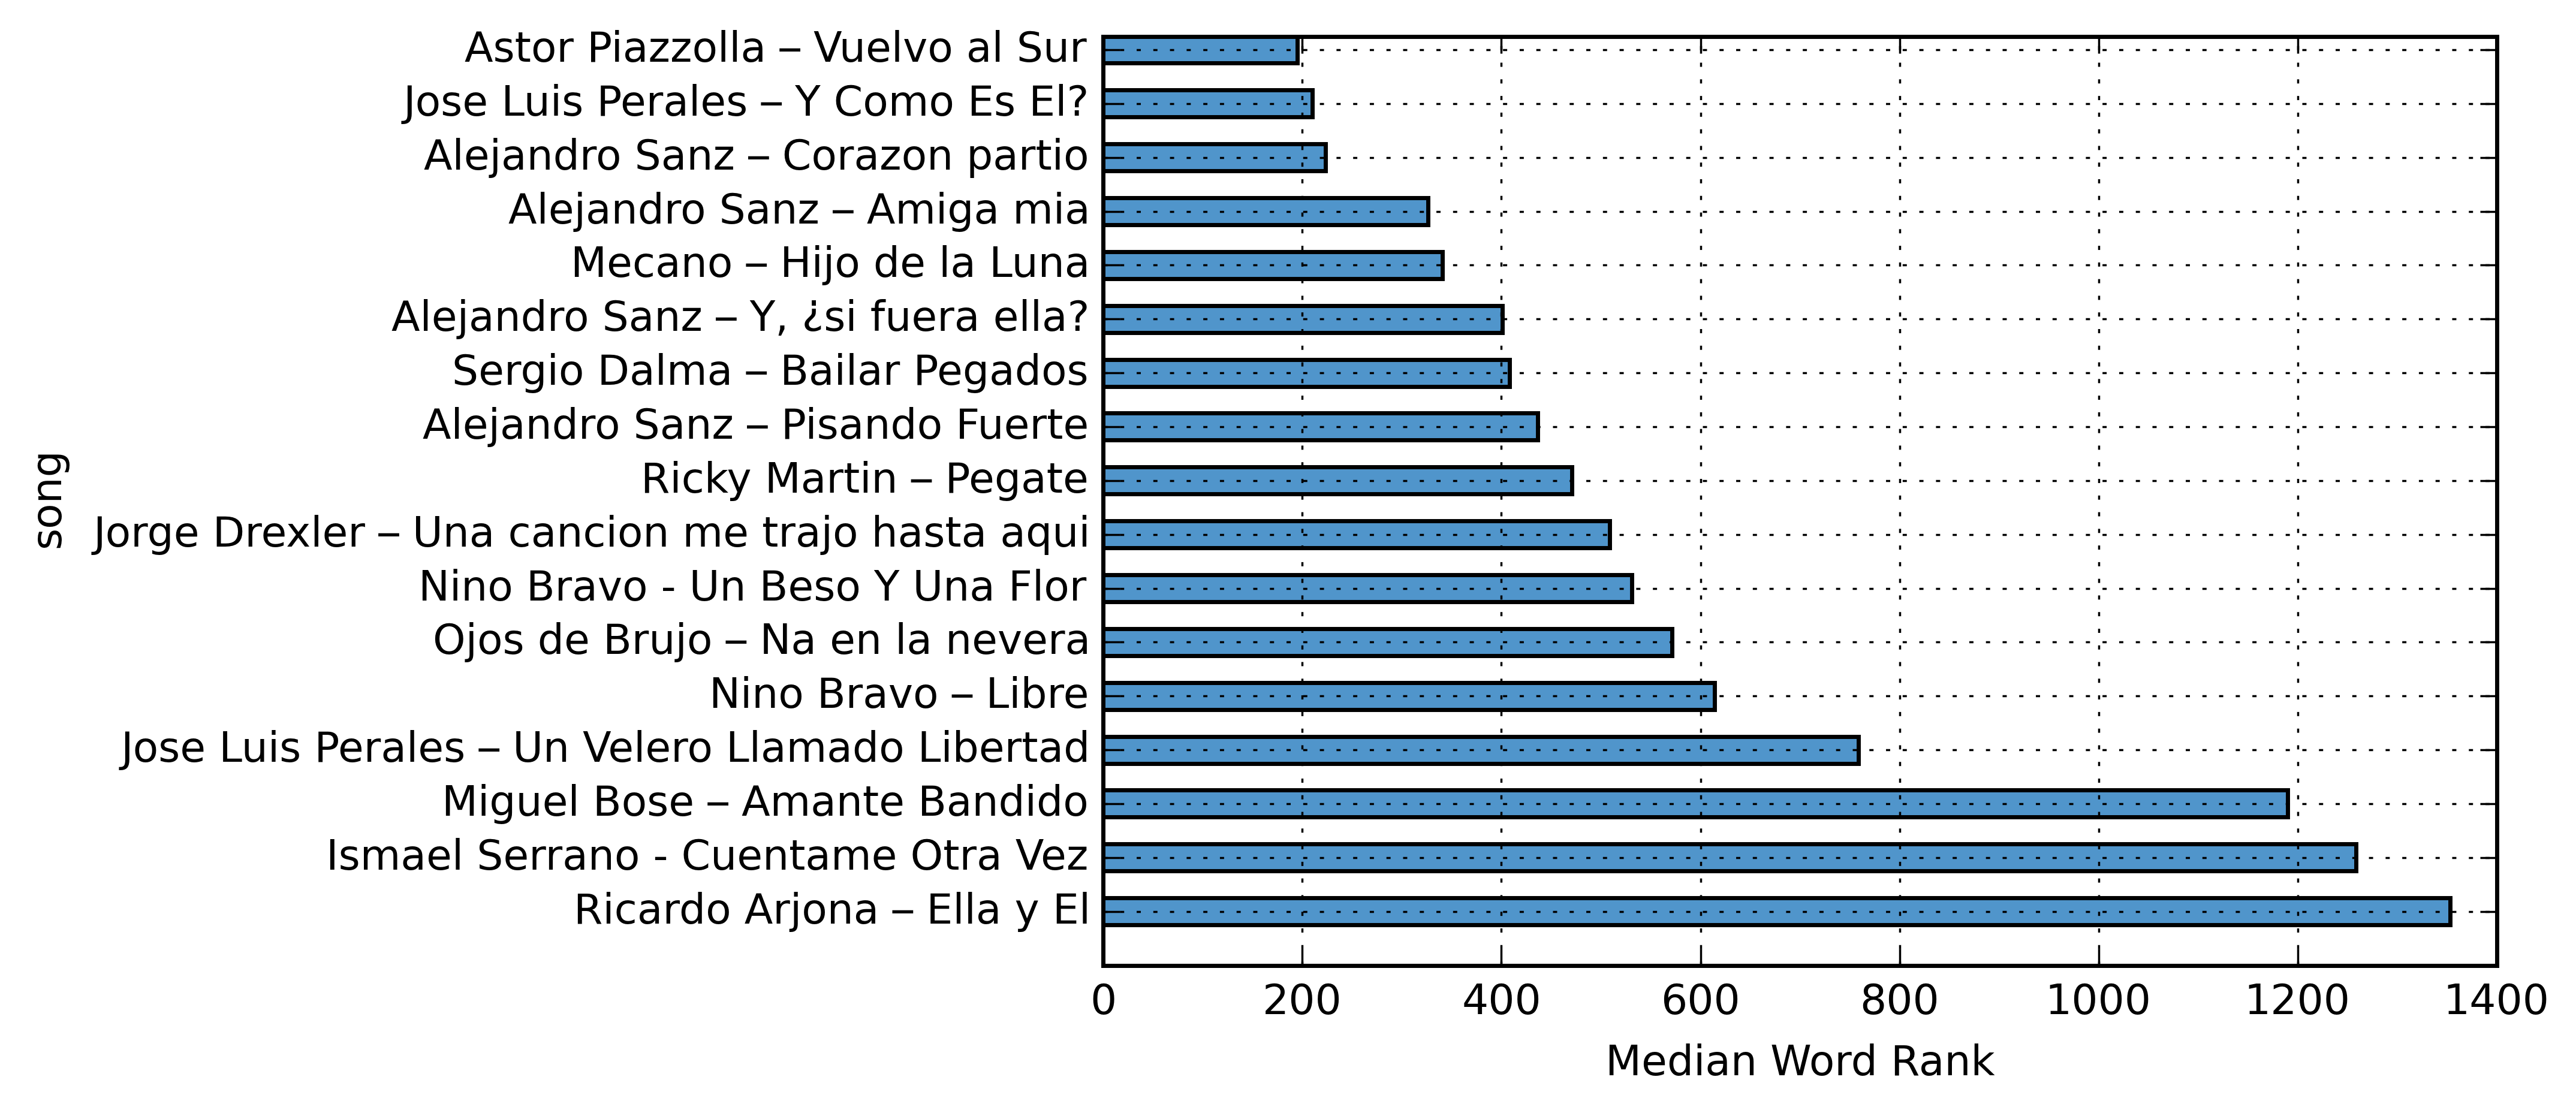

In [218]:
word_median.order(ascending=False).plot(kind="barh",color='#5095CB')
_ = xlabel("Median Word Rank")

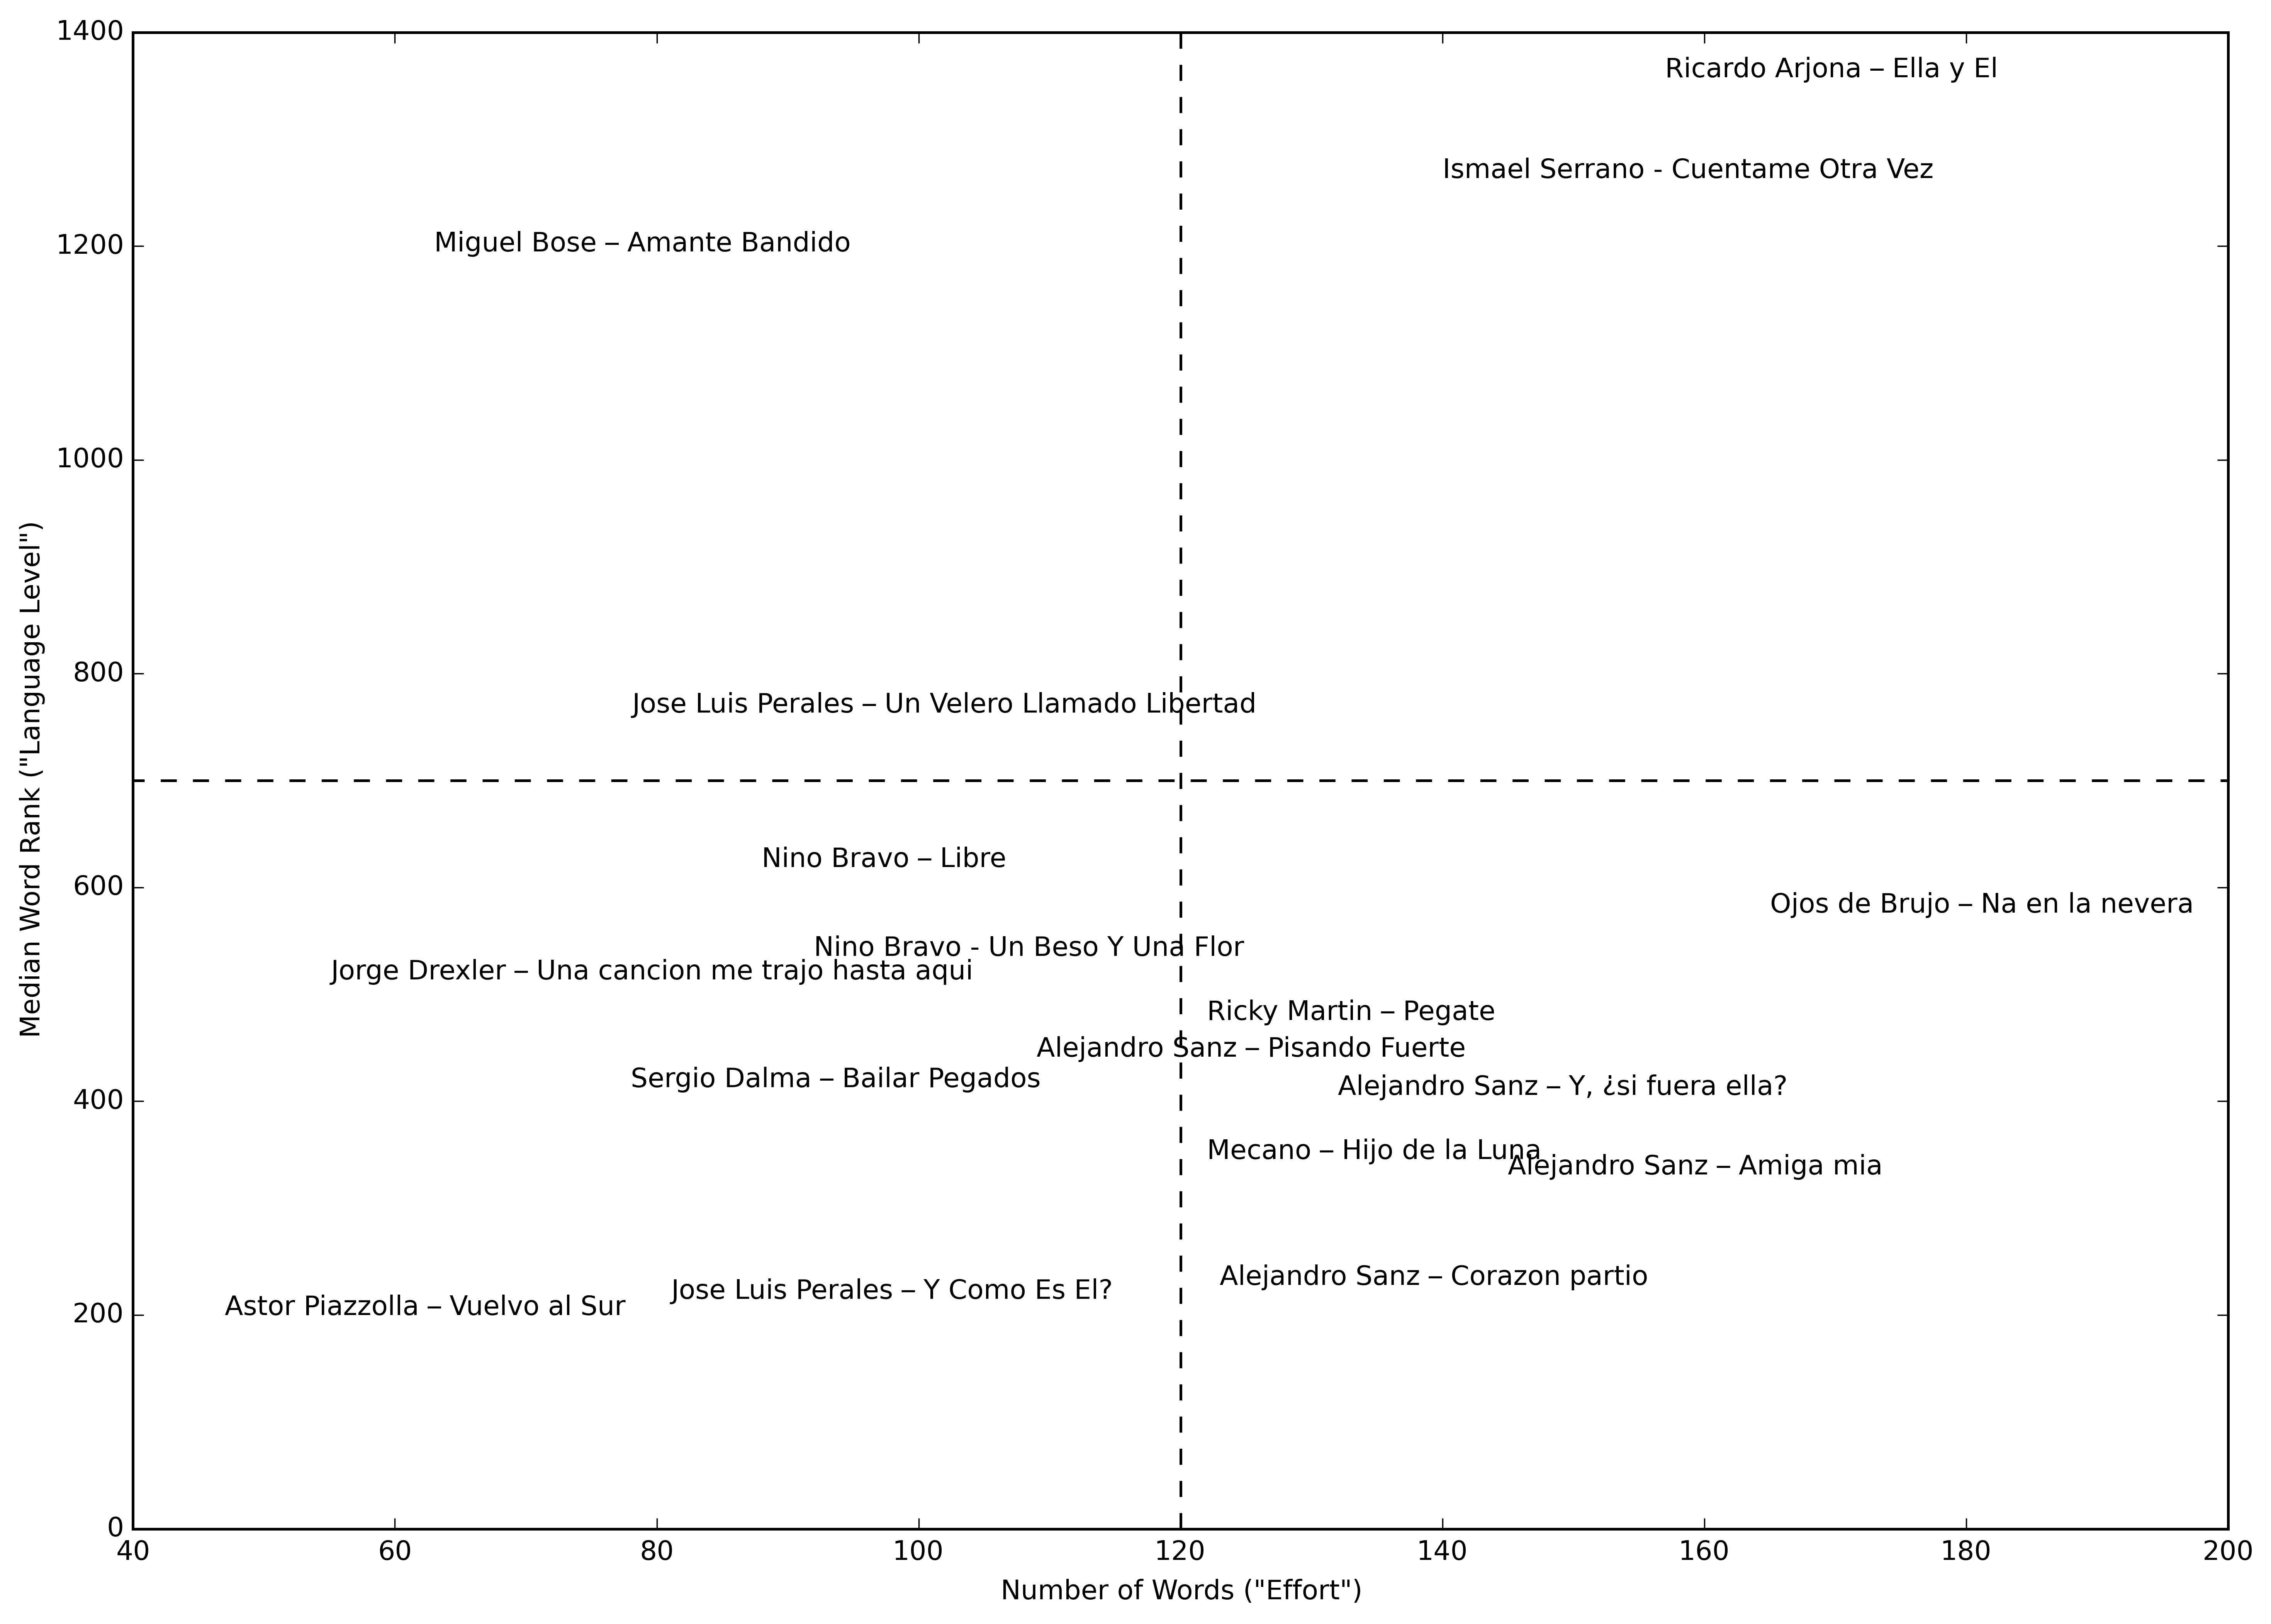

In [236]:
figsize(14,10)
plt.plot(num_words,word_median,"w.",)
plt.xlim(40,200)
plt.ylim(0,1400)
for i in range(len(num_words)):
    plt.text(num_words.ix[i]+1,word_median.ix[i]+5,word_median.index[i].decode("utf-8"),fontdict={"fontsize":10})
_ = xlabel('Number of Words ("Effort")')
_ = ylabel('Median Word Rank ("Language Level")')
plt.plot([120,120],[0,1500],'k--') # vertical line
plt.plot([0,200],[700,700],'k--') # horizontal line